## **Tugas 4, Komputasi Nuklir**
**Dhiya Salma Salsabila/24923304**

## Soal
1. Membuat program transfer panas dengan persamaan konduksi untuk 2 dimensi koordinat kartesian

## Jawab
## <center>**Hukum Fourier**</center> 
<br> Dalam hukum fourier menyatakan bahwa tingkat perpindahan panas melalui sebuah material berbandung lurus dengan gradien pada suhu dan luas.
<br> Bentuk diferensial hukum fourier:
$$ \vec{q} = -k \nabla T $$
Dimana:
- $ \vec{q} $ : densitas aliran panas
- k : konduktivitas termal
- $\nabla$ T : gradien suhu

<br> Dengan menggunakan prinsip kekekalan energi:
$$ \frac{\partial T}{\partial t} = \alpha \nabla^2 T $$
<br> Operator laplace untuk koordinat 2 dimensi kartesian:
$$ \nabla^2 T = \frac{\partial^2 T}{\partial x^2}+ \frac{\partial^2 T}{\partial y^2}$$
<br> Maka persamaan menjadi:
$$ \frac{\partial T(x,y,t)}{\partial t} = \alpha [\frac{\partial^2 T(x,y,t)}{\partial x^2}+ \frac{\partial^2 T(x,y,t)}{\partial y^2}]$$

Digunakan penyelesaian dengan numerik menggunakan metode forward diffrence dan central difference, dimana:
- Forward Difference
$$ \frac{\partial T(x,y,t)}{\partial t} = \frac{T(x,y,t+\Delta t)-T(x,y,t)}{ \Delta t}$$
- Central Difference
$$ \frac{\partial^2 T(x,y,t)}{\partial x^2} = \frac{T(x+\Delta x,y,t)-2T(x,y,t)+T(x-\Delta x,y,t)}{\Delta x^2}$$
$$ \frac{\partial^2 T(x,y,t)}{\partial y^2} = \frac{T(x,y+\Delta y,t)-2T(x,y,t)+T(x,y-\Delta y,t)}{\Delta y^2}$$

Maka persamaan menjadi:
$$ \frac{T(x,y,t+\Delta t)-T(x,y,t)}{ \Delta t} = \alpha [\frac{T(x+\Delta x,y,t)-2T(x,y,t)+T(x-\Delta x,y,t)}{\Delta x^2} + \frac{T(x,y+\Delta y,t)-2T(x,y,t)+T(x,y-\Delta y,t)}{\Delta y^2}] $$

Syarat stabilitas dengan CLF:
$$  (\frac{\alpha \Delta t}{\Delta x^2+\Delta y^2}) \leq \frac{1}{2} $$
maka
$$ \Delta t \leq \frac{\Delta x^2+\Delta y^2}{2 \alpha} $$

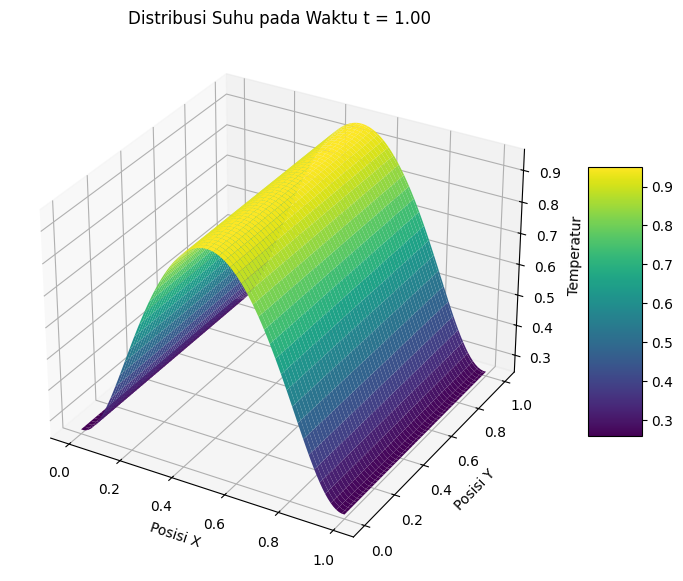

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initial Values
L = 1.0                 # panjang batang 2D
WaktuMax = 1.0          # waktu maksimal
alpha = 0.5             # difusivitas termal
Nx = 100                # jumlah diskritisasi X
Ny = 100                # jumlah diskritisasi Y
Nt = 100                # jumlah diskritisasi waktu

def transfer_panas(L, WaktuMax, alpha, Nx, Ny, Nt):
    dx = L / Nx             # delta x
    dy = L / Ny             # delta y
    dt = min(dx**2,dy**2)/(2*alpha)
    x = np.linspace(0, L, Nx)
    y = np.linspace(0, L, Ny)
    t = np.linspace(0, WaktuMax, Nt)
    # Keadaan awal
    T = np.zeros((Nt, Nx, Ny))
    T[0, :, :] = np.sin(np.pi * x)
    # Iterasi waktu
    for i in range(0, Nt-1):
        # Iterasi posisi x
        for j in range(1, Nx-1):
            # Iterasi poisisi y
            for k in range(1, Ny-1):
                T[i+1, j, k] = T[i, j, k] + alpha * dt  * (((T[i,j+1,k] - 2*T[i,j,k] + T[i,j-1,k])/dx**2) + ((T[i, j, k+1] - 2*T[i,j,k] + T[i,j,k-1])/dy**2))
        # Syarat batas
        T[i+1, :, 0] = T[i+1, :, 1]          # batas kiri
        T[i+1, :, -1] = T[i+1, :, -2]        # batas kanan
        T[i+1, 0, :] = T[i+1, 1, :]          # batas bawah
        T[i+1, -1, :] = T[i+1, -2, :]        # batas atas
    return T, x, y, t

T, x, y, t = transfer_panas(L, WaktuMax, alpha, Nx, Ny, Nt)

def plot_grafik(T, x, y, t, index):
    # Membuat meshgrid untuk koordinat x dan y
    X, Y = np.meshgrid(x, y)
    # Menggambarkan plot 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, T[index], cmap='viridis')
    ax.set_xlabel('Posisi X')
    ax.set_ylabel('Posisi Y')
    ax.set_zlabel('Temperatur')
    ax.set_title(f'Distribusi Suhu pada Waktu t = {t[index]:.2f}')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    plt.show()
    
plot_grafik(T , x, y, t, -1)